In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";   

In [2]:
import ktrain
from ktrain import text

Using TensorFlow backend.


In [3]:
# load training and validation data from a folder
# download and unzip IMDb dataset:  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
DATADIR = 'data/aclImdb'
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(DATADIR, 
                                                                         max_features=20000, maxlen=400, 
                                                                         ngram_range=1, 
                                                                         classes=['pos', 'neg'])

Word Counts: 88582
Nrows: 25000
25000 train sequences
Average train sequence length: 231
x_train shape: (25000,400)
y_train shape: (25000,2)
25000 test sequences
Average test sequence length: 224
x_test shape: (25000,400)
y_test shape: (25000,2)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
def get_model():
    model = Sequential()
    model.add(Embedding(20000+1, 50, input_length=400)) # add 1 for padding token
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()

In [5]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
25000/25000 [==============================] - 5s 187us/step - loss: 0.6942 - acc: 0.4932
Epoch 2/1024
25000/25000 [==============================] - 4s 172us/step - loss: 0.5448 - acc: 0.7606
Epoch 3/1024
   32/25000 [..............................] - ETA: 4s - loss: 1.3311 - acc: 0.8750

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


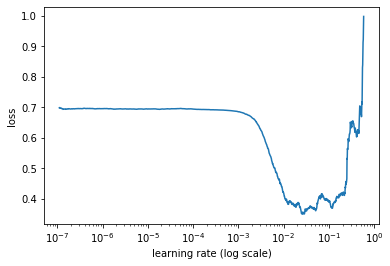

In [6]:
learner.lr_find()
learner.lr_plot()

In [7]:
learner.autofit(0.005, 2)



begin training using triangular learning rate policy with max lr of 0.005...
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 6s 241us/step - loss: 0.5540 - acc: 0.7531 - val_loss: 0.4021 - val_acc: 0.8615
Epoch 2/2
25000/25000 [==============================] - 6s 240us/step - loss: 0.3062 - acc: 0.8922 - val_loss: 0.2988 - val_acc: 0.8853


In [8]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [9]:
data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
         'The film really sucked. I want my money back.',
        'What a beautiful romantic comedy. 10/10 would see again!']

In [10]:
predictor.predict(data)

['neg', 'neg', 'pos']

In [11]:
predictor.save('/tmp/mypred')

In [12]:
predictor = ktrain.load_predictor('/tmp/mypred')

In [13]:
predictor.predict(['The plot had lots of holes and did not make sense'])

['neg']